<a href="https://colab.research.google.com/github/Abhinandan-Pal/Pandemic-Simulator/blob/master/Mutiple_community/Pandemic_Simulator(Mulltiple__community).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
spread_limit = 9
recovery_prob = 0.70
intial_count = 9
infection_rate = 0.5
population = 1000

In [3]:
landmark = []
landmark_prob = 0.3
landmark_prob_dec_rate = 0.8

In [4]:
lock_ratio = 0.8
lock_decrease_rate = 0.2
lock_increase_rate = 0.1
lock_infected_count = 100

In [5]:
no_of_region = 10

In [6]:

def initialize():
    global infected_count,dead_count,recovered_count,infected,pos,infected_count_arr
    global dead_count_arr,recovered_count_arr,non_infected_count_arr,lock_count,landmark_prob_values,lock_count_arr 
    pos = pd.DataFrame()
    pos['x'] =[]
    pos['y'] =[]
    pos['Quar'] = []
    pos['region'] = []

    infected = pd.DataFrame()
    infected['x'] = []
    infected['y'] = []
    infected['time'] = []
    infected['region'] = []

    infected_count = intial_count
    dead_count = 0
    recovered_count = 0
    lock_count = 0

    infected_count_arr = []
    dead_count_arr = []
    recovered_count_arr = []
    non_infected_count_arr = []
    landmark_prob_values = []
    lock_count_arr = []

    for i in range(population):
        reg = random.randint(0, no_of_region-1)
        y = random.randint(0, population/10/no_of_region)
        x = random.randint(0, population/10/no_of_region)+(reg)*(population/10/no_of_region)
        pos.loc[i]=[x,y,0,reg]
        # RUN THIS SECTION SO SEE INITIAL DISTRIBUTION
        #fig = plt.figure(figsize=(no_of_region, 1))
        #ax = fig.add_subplot(111)
        #ax.scatter(pos['x'],pos['y'])
        #---------------------------------------------

    for i in range(10):
        infected.loc[i]= [pos['x'][i],pos['y'][i],1,pos['region'][i]]

    pos = pos.iloc[10:]
    pos = pos.reset_index(drop=True)   
    
    # set landmarks for each regions
    for reg in range(no_of_region):
        y = random.randint(0, population/10/no_of_region)
        x = random.randint(0, population/10/no_of_region)+(reg)*(population/10/no_of_region)
        landmark.append([x,y])

In [7]:
def isolation_initiate():
    global lock_count
    for i in range(len(pos['x'])):
        if(random.random()<lock_ratio):
            pos.Quar[i]= 1
            lock_count = lock_count + 1

In [8]:
def isolation():
    global lock_count
    i = 0

    for i in range(len(pos['x'])):
        t = random.random()
        if(t<lock_increase_rate):
            pos.Quar[i] = min(pos.Quar[i]+ random.random(),1)
            lock_count = lock_count + 1
        elif(t <( lock_increase_rate+lock_decrease_rate)):
            pos.Quar[i] = max(pos.Quar[i]- random.random(),0)
            lock_count = lock_count - 1

In [9]:
def distance(pos1,pos2):
    return ((infected['x'][pos2]-pos['x'][pos1])**2)+((infected['y'][pos2]-pos['y'][pos1])**2)

In [10]:
def infected_check(pos1):
    iso = 1- pos['Quar'][pos1]
    return (random.random()<infection_rate*iso)

In [11]:

def region_check(pos1,pos2):
    if(pos['region'][pos1]==infected['region'][pos2]):
            return True
    return False

In [12]:
def infect():
    global pos,infected_count
    i = 0
    move_around()
    while(i < len(pos['x'])):
        for j in range(infected_count):
            if(i>=len(pos['x'])):
                break
            if(region_check(i,j)):
                if(distance(i,j)< spread_limit):
                    if(infected_check(i)):
                        infected.loc[infected_count]= [pos['x'][i],pos['y'][i],1,pos['region'][i]]
                        infected_count = infected_count + 1   
                        pos = pos.drop(i)
                        pos = pos.reset_index(drop=True) 
        
        i = i +1    

EDIT FROM MOVE AROUND

In [13]:
def move_around():
    global landmark_prob,landmark_prob_values
    for i in range(len(pos['x'])):
        if(random.random()<landmark_prob):
            x,y = landmark[random.randint(0, len(landmark)-1)]
            pos.loc[i]=[x,y,pos['Quar'][i],pos['region'][i]]
        else:     
            reg = pos['region'][i]
            y = random.randint(0, population/10/no_of_region)
            x = random.randint(0, population/10/no_of_region)+(reg)*(population/10/no_of_region)
            pos.loc[i]=[x,y,pos['Quar'][i],reg]
    landmark_prob = landmark_prob* landmark_prob_dec_rate
    landmark_prob_values.append(landmark_prob)


In [14]:
def day():
    global infected_count,dead_count,recovered_count,infected,pos,lock_count_arr,lock_count #getting global data
    
    isolation()
    if(infected_count > lock_infected_count):
        isolation_initiate()
    
    infected_count_arr.append(infected_count)
    non_infected_count_arr.append(len(pos['x']))
    dead_count_arr.append(dead_count)
    recovered_count_arr.append(recovered_count)
    # increase infected time and remove necessary
    for i in range(len(infected['time'])):
        infected['time'][i]= infected['time'][i] +1
        if (infected['time'][i]>3):
            infected = infected.drop(i)
            removed()
    # set new loction for all not infected
    infected = infected.reset_index(drop=True)
    infected_count = len(infected['time'])  
    infect()
    lock_count_arr.append(lock_count)    


In [15]:
def removed():
    if(random.random()<recovery_prob):
        global recovered_count
        recovered_count = recovered_count + 1
    else :
        global dead_count
        dead_count = dead_count + 1


In [16]:
def day_call():
    initialize()
    while(infected_count != 0 ):
        day()

In [17]:
day_call()

Get plot an data for a virtual environment of a given parameter

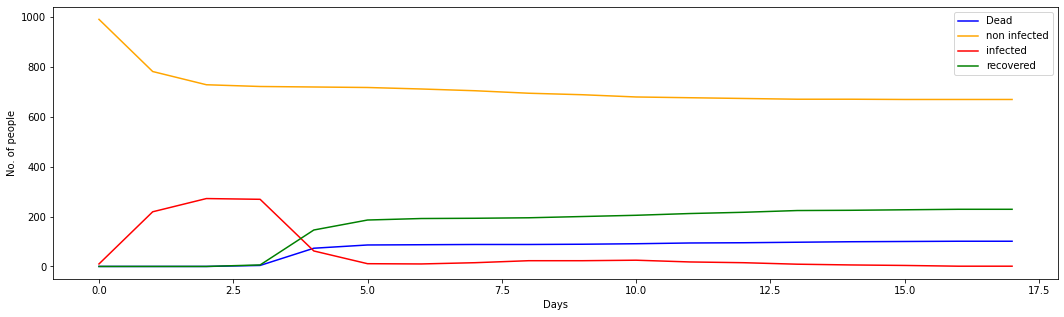

In [19]:
name = "plot 1"
my_file = open(name + ".txt","w")
txt = "People are divided into regions. They move around in their own region sometimes to go to captials of other regions helping spread the disease "
txt = txt + "People start going to lockdown as the disease spreads. There is a gov. sanctioned lockdown after a ceratin a given infected count. More no of. people tend to disobey with time.\n\n"
txt = txt +"Parameters:\n spread_limit = {}\n recovery_prob = {}\n intial_count = {}\n infection_rate = {}\n ".format(spread_limit,recovery_prob,intial_count,infection_rate)
txt = txt + "population = {}\n landmark = {}\n  landmark_prob = {}\n landmark_prob_dec_rate = {}\n lock_ratio = {}\n ".format(population,landmark,landmark_prob,landmark_prob_dec_rate,lock_ratio)
txt = txt + "lock_decrease_rate = {}\n lock_increase_rate = {}\n  lock_infected_count = {}\n".format(lock_decrease_rate,lock_increase_rate,lock_infected_count)
my_file.write(txt)

fig = plt.figure(figsize=(len(dead_count_arr), 5))
ax = fig.add_subplot(111)
ax.plot(dead_count_arr,color='blue')
ax.plot(non_infected_count_arr,color='orange' )
ax.plot(infected_count_arr,color='red' )
ax.plot(recovered_count_arr,color='green')

plt.gca().legend(['Dead', 'non infected','infected', 'recovered'], loc='best')
plt.xlabel("Days")
plt.ylabel("No. of people")
plt.savefig(name+ ".pdf")
#ax.show()
plt.show()

Change in total involved,safe,and days taken with change in spread_limit

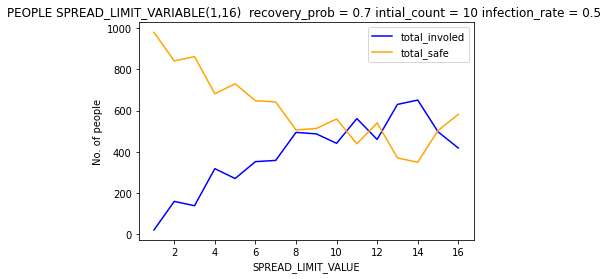

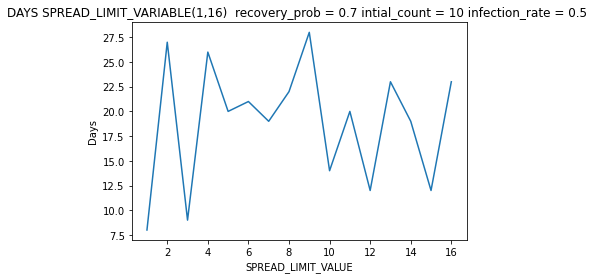

In [20]:
total_involed = []
total_safe = []
days = []
spread_limit_values = []
def spread_limit_change():
    global spread_limit
    spread_limit = 1
    for i in range(16):    
        day_call()
        total_involed.append(recovered_count + dead_count)
        total_safe.append(population - recovered_count - dead_count)
        days.append(len(recovered_count_arr))
        spread_limit_values.append(spread_limit)
        spread_limit = spread_limit + 1
    
spread_limit_change()

txt="PEOPLE SPREAD_LIMIT_VARIABLE(1,16)  recovery_prob = {} intial_count = {} infection_rate = {} ".format(recovery_prob,intial_count,infection_rate)
plt.plot(spread_limit_values,total_involed ,color='blue')
plt.plot(spread_limit_values,total_safe,color='orange' )
plt.xlabel("SPREAD_LIMIT_VALUE")
plt.ylabel("No. of people")
plt.legend(['total_involed', 'total_safe'], loc='best')
plt.title( txt)
plt.savefig(txt+ ".pdf")
plt.show()

txt="DAYS SPREAD_LIMIT_VARIABLE(1,16)  recovery_prob = {} intial_count = {} infection_rate = {} ".format(recovery_prob,intial_count,infection_rate)
plt.plot(spread_limit_values,days)
plt.xlabel("SPREAD_LIMIT_VALUE")
plt.ylabel("Days")
plt.title( txt)
plt.savefig(txt+ ".pdf")
plt.show()

Change in total involved,safe,and days taken with change in intial_count

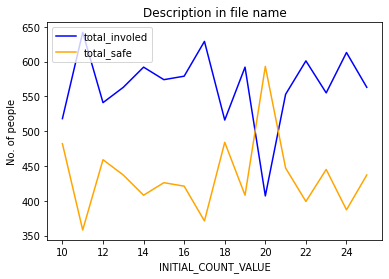

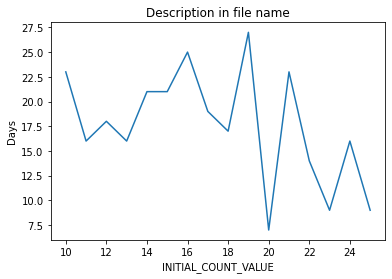

In [21]:
total_involed = []
total_safe = []
days = []
intial_count_values = []
def intial_count_change():
    global intial_count
    intial_count = 10
    for i in range(16):    
        day_call()
        total_involed.append(recovered_count + dead_count)
        total_safe.append(population - recovered_count - dead_count)
        days.append(len(recovered_count_arr))
        intial_count_values.append(intial_count)
        intial_count = intial_count + 1
    
intial_count_change()

txt="PEOPLE INITIAL_COUNT_VARIABLE(10,25,step = 1)  recovery_prob = {} intial_count = {} infection_rate = {} ".format(recovery_prob,intial_count,infection_rate)
plt.plot(intial_count_values,total_involed ,color='blue')
plt.plot(intial_count_values,total_safe,color='orange' )
plt.xlabel("INITIAL_COUNT_VALUE")
plt.ylabel("No. of people")
plt.legend(['total_involed', 'total_safe'], loc='best')
plt.title( "Description in file name")
plt.savefig(txt+ ".pdf")
plt.show()

txt="DAYS INITIAL_COUNT_VARIABLE(10,40,step = 1)  recovery_prob = {} intial_count = {} infection_rate = {} ".format(recovery_prob,intial_count,infection_rate)
plt.plot(intial_count_values,days)
plt.xlabel("INITIAL_COUNT_VALUE")
plt.ylabel("Days")
plt.title( "Description in file name")
plt.savefig(txt+ ".pdf")
plt.show()

 Change in total involved,safe,and days taken with change in infection_rate

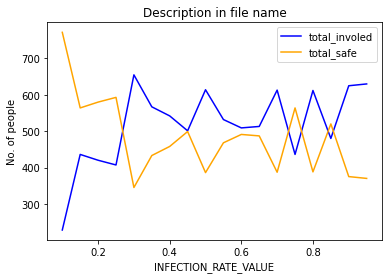

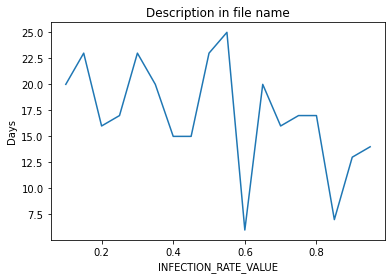

In [22]:
total_involed = []
total_safe = []
days = []
infection_rate_values = []
def infection_rate_change():
    global infection_rate
    infection_rate = 0.10
    for i in range(18):    
        day_call()
        total_involed.append(recovered_count + dead_count)
        total_safe.append(population - recovered_count - dead_count)
        days.append(len(recovered_count_arr))
        infection_rate_values.append(infection_rate)
        infection_rate = infection_rate + 0.05
    
infection_rate_change()

txt="PEOPLE INFECTION_RATE_VARIABLE(0.1,1,step =.05)  recovery_prob = {} intial_count = {} spread_limit = {} ".format(recovery_prob,intial_count,spread_limit)
plt.plot(infection_rate_values,total_involed ,color='blue')
plt.plot(infection_rate_values,total_safe,color='orange' )
plt.xlabel("INFECTION_RATE_VALUE")
plt.ylabel("No. of people")
plt.legend(['total_involed', 'total_safe'], loc='best')
plt.title( "Description in file name")
plt.savefig(txt+ ".pdf")
plt.show()

txt="DAYS INFECTION_RATE_VARIABLE(0.1,1,step =.05) recovery_prob = {} intial_count = {} spread_limit = {} ".format(recovery_prob,intial_count,spread_limit)
plt.plot(infection_rate_values,days)
plt.xlabel("INFECTION_RATE_VALUE")
plt.ylabel("Days")
plt.title( "Description in file name")
plt.savefig(txt+ ".pdf")
plt.show()